# BIKE RENTAL - ASSIGNMENT

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### WRITING CSV TO VARIABLE "data"

In [2]:
data = pd.read_csv(r"D:\Siddharth Upgrad\Case Study\4. Linear Regression assignment\day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### DATA CLEANING AND DATA PREPARATION

#### 1. Season column is converted to 3 dummy variables namely
#### a. spring
#### b.summer 
#### c. fall 
#### and the column season is dropped after dummy variables are created .

In [4]:
data['spring'] = data['season'].apply(lambda x:1 if x == 1 else 0)
data['summer'] = data['season'].apply(lambda x:1 if x == 2 else 0)
data['fall'] = data['season'].apply(lambda x:1 if x == 3 else 0)

data = data.drop(columns = 'season')

#### 2. weathersit variable is converted to 3 categorical variables
#### a. clear_partly cloudy 
#### b. misty 
#### c. light_rain_snow

#### in our dataset only 3 unique values of variable "weathersit" are present. However since as per data dictionary there is also a 4th expected value. So 3 dummy variables are created inline with the definition in the data dictionary.

In [5]:
data['clear_partlycloudy'] = data['weathersit'].apply(lambda x:1 if x == 1 else 0)
data['misty'] = data['weathersit'].apply(lambda x:1 if x == 2 else 0)
data['light_rain_snow'] = data['weathersit'].apply(lambda x:1 if x == 3 else 0)
data = data.drop(columns = 'weathersit')

#### Checking correlation between the variables and plotting heatmap

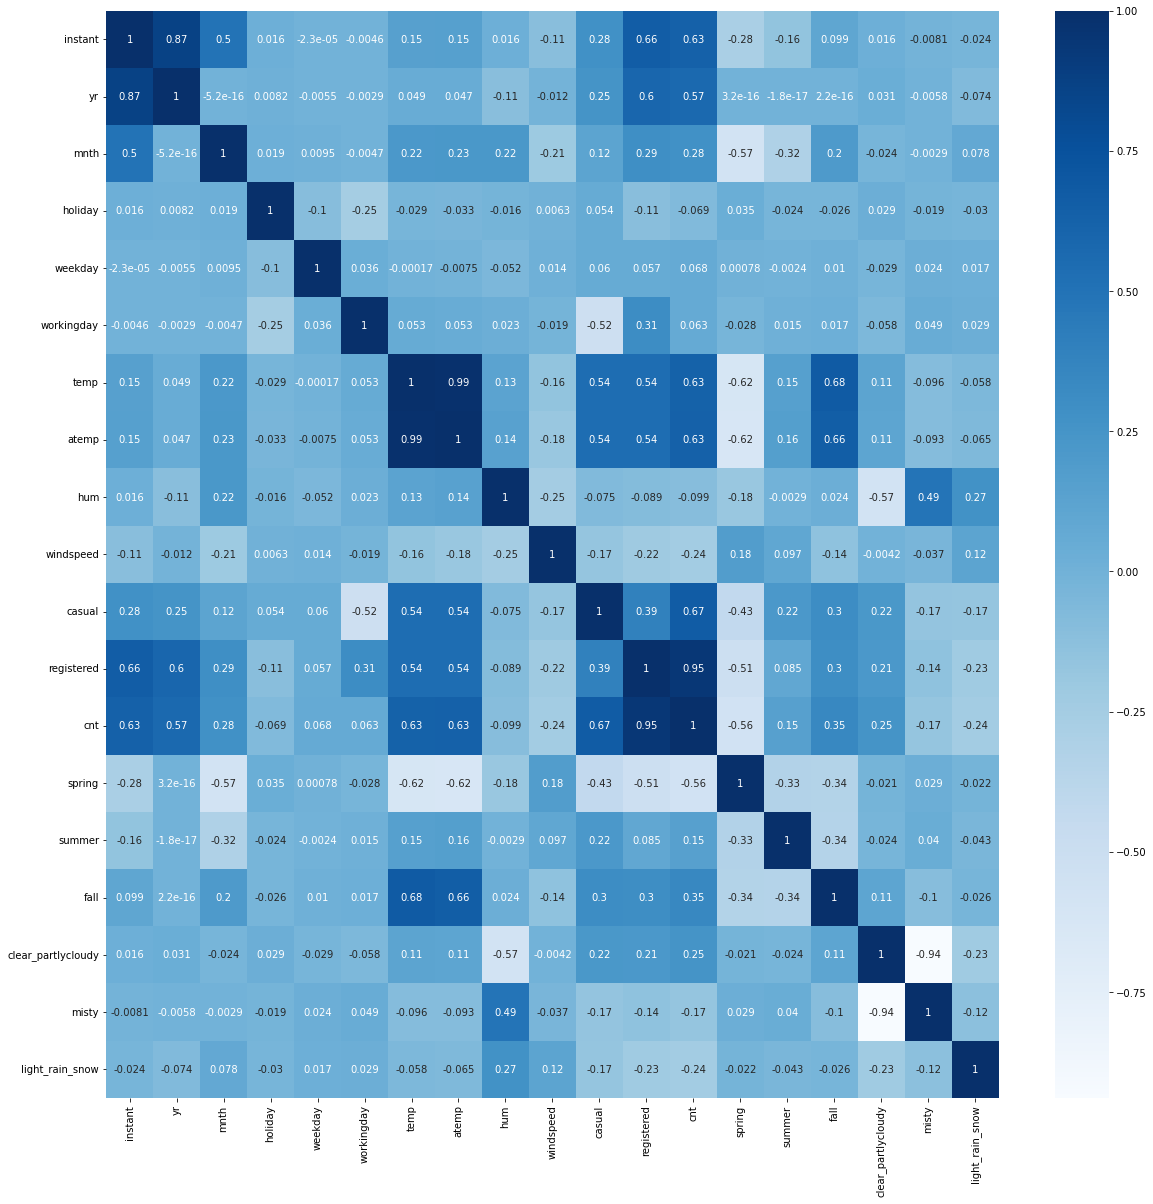

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

#### REMOVING UNWANTED VARIABLES
##### 1. instant
##### 2. dteday

In [7]:
data = data.drop(columns = 'instant')
data = data.drop(columns = 'dteday')

#### Variables "temp" and "atemp" are having high corelation. Keeping only 1 of the variable out of them.
#### Removing atemp variable and keeping "temp" variable.


In [8]:
data = data.drop(columns = 'atemp')

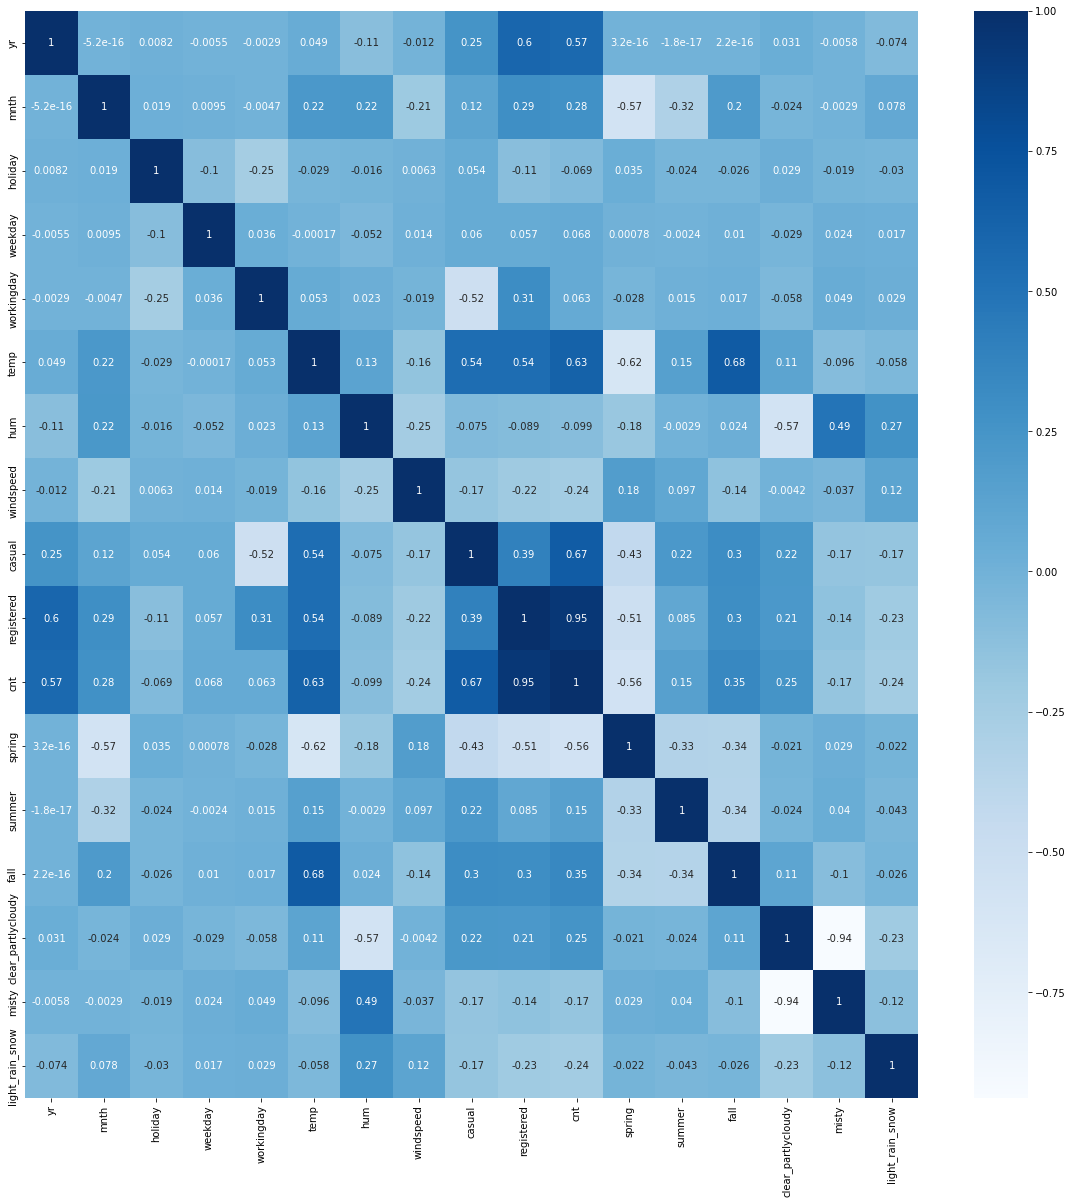

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

#### OTHER OBSERVATION
#### COLUMN "registered" is seen to have very high correlation with the target variable "cnt".  One model was developed with keeping the registered column which shows a high dependance of target variable on this variable and all other variables are deemed insignificant. So instead of keeping "registered" column another variable is derieved which is the ratio of registered / casual which is named as "reg_by_casual"

In [10]:
data['reg_by_casual'] = round(data['registered']/data['casual'],3)

In [11]:
data = data.drop(columns = ['registered','casual'])

#### USING STATSMODELS TO BUILD MODEL

In [12]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### PERFORMING A TRAIN_TEST_SPLIT ON THE DATASET

In [13]:
data_train,data_test = train_test_split(data,train_size=0.7,random_state=10)

In [14]:
y_train = data_train.pop('cnt')
X_train = data_train

In [15]:
print(X_train.shape)
print(y_train.shape)

(510, 15)
(510,)


In [16]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,fall,clear_partlycloudy,misty,light_rain_snow,reg_by_casual
72,0,3,0,1,1,13.333897,49.6957,9.174042,1,0,0,1,0,0,4.699
510,1,5,0,6,0,28.392500,73.2500,13.332464,0,1,0,1,0,0,1.289
700,1,12,0,0,0,14.247500,82.3333,8.333393,0,0,0,0,1,0,4.212
264,0,9,0,4,1,25.761653,90.2083,8.584375,0,0,1,0,1,0,7.640
577,1,8,0,3,1,29.417500,67.7500,9.458993,0,0,1,1,0,0,6.058


#### SINCE THE VARIABLES ARE NOT IN VERY DIFFERENT SCALE RANGES NORMALISATION IS NOT PERFORMED AND WE DIRECTLY START TO BUILD THE MODEL

### MODEL 1
#### CONSIDERING ALL THE VARIABLES FOR BUILDING MODEL

In [17]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          8.14e-181
Time:                        09:04:24   Log-Likelihood:                -4134.9
No. Observations:                 510   AIC:                             8300.
Df Residuals:                     495   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1978.8260    307.501      6.435      0.000    1374.657    2582.995
yr                  2079.5500     74.393     27.954      0.000    1933.385    2225.715
mnth                 -20.5276     18.923     -1.085      0.279     -57.706      16.651
holiday             -700.5470    211.297     -3.315      0.001   -1115.697    -285.397
weekday               59.4032     18.512      3.209      0.001      23.032      95.775
workingday           120.4927     96.234      1.252      0.211     -68.585     309.570
temp                 120.4884      9.561     12.602      0.000     101.703     139.274
hum                  -13.1747      3.723     -3.539      0.000     -20.490      -5.859
windspeed            -42.6129      7.554     -5.641      0.000     -57.454     -27.772
spring             -1678.4417    178.976     -9.378      0.000   -2030.088   -1326.795
summer              -574.9054    160.695     -3.578      0.000    -890.633    -259.178
fall                -730.1214    153.464     -4.758      0.000   -1031.642    -428.600
clear_partlycloudy  1348.3855     97.747     13.795      0.000    1156.336    1540.435
misty                917.5991    119.480      7.680      0.000     682.849    1152.350
light_rain_snow     -287.1586    218.094     -1.317      0.189    -715.662     141.345
reg_by_casual        -11.8447      7.115     -1.665      0.097     -25.825       2.135
==============================================================================
Omnibus:                       69.469   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.449
Skew:                          -0.718   Prob(JB):                     3.22e-36
Kurtosis:                       5.373   Cond. No.                     5.22e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### CHECKING VIF FACTOR TO DETECT MULTICOLINEARITY

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]

vif['VIF'] = round(vif['VIF'],3)

vif = vif.sort_values(by='VIF',ascending=False)

print(vif)

              Features     VIF
11  clear_partlycloudy  63.978
12               misty  43.346
13     light_rain_snow   6.297
8               spring   4.571
9               summer   3.781
5                 temp   3.737
1                 mnth   3.411
10                fall   3.251
6                  hum   2.208
14       reg_by_casual   2.078
4           workingday   1.519
7            windspeed   1.222
2              holiday   1.104
0                   yr   1.061
3              weekday   1.028


#### REMOVING VARIABLE "clear_partlycloudy"

In [19]:
X_train = X_train.drop(columns='clear_partlycloudy')

### RECHECKING VIF

In [20]:
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],3)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

           Features     VIF
6               hum  31.772
5              temp  28.310
1              mnth  11.226
7         windspeed   6.726
4        workingday   4.892
13    reg_by_casual   4.278
9            summer   4.240
10             fall   4.227
8            spring   4.105
3           weekday   3.316
11            misty   2.368
0                yr   2.079
12  light_rain_snow   1.414
2           holiday   1.138


#### REMOVING VARIABLE "hum"


In [21]:
X_train = X_train.drop(columns='hum')

### RECHECKING VIF


In [22]:
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],3)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

           Features     VIF
5              temp  19.620
1              mnth   8.250
6         windspeed   6.614
4        workingday   4.839
9              fall   4.197
12    reg_by_casual   3.966
8            summer   3.930
3           weekday   3.312
7            spring   3.137
0                yr   2.053
10            misty   1.609
11  light_rain_snow   1.146
2           holiday   1.138


#### REMOVING VARIABLE "temp"

In [23]:
X_train = X_train.drop(columns='temp')

### RECHECKING VIF


In [24]:
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],3)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

           Features    VIF
5         windspeed  6.413
1              mnth  5.137
4        workingday  4.539
11    reg_by_casual  3.823
3           weekday  3.300
6            spring  2.859
7            summer  2.345
0                yr  1.995
8              fall  1.800
9             misty  1.608
10  light_rain_snow  1.145
2           holiday  1.136


#### REMOVING VARIABLE "windspeed"

In [25]:
X_train = X_train.drop(columns='windspeed')

### RECHECKING VIF


In [26]:
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],3)
vif = vif.sort_values(by='VIF',ascending=False)
print(vif)

           Features    VIF
4        workingday  4.530
1              mnth  4.094
10    reg_by_casual  3.743
3           weekday  3.258
5            spring  2.148
0                yr  1.984
6            summer  1.763
7              fall  1.670
8             misty  1.608
2           holiday  1.134
9   light_rain_snow  1.133


#### REBUILDING THE MODEL SINCE ALL THE VIF IS BELOW 5 
#### MODEL - 2

In [27]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.06e-149
Time:                        09:04:26   Log-Likelihood:                -4216.9
No. Observations:                 510   AIC:                             8458.
Df Residuals:                     498   BIC:                             8509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4353.6687    274.944     15.835      0.000    3813.476    4893.861
yr               2194.4160     85.207     25.754      0.000    2027.006    2361.826
mnth              -29.4365     22.026     -1.336      0.182     -72.712      13.839
holiday          -716.4547    247.215     -2.898      0.004   -1202.167    -230.742
weekday            47.8955     21.573      2.220      0.027       5.511      90.280
workingday        447.5579    108.998      4.106      0.000     233.405     661.710
spring          -2278.2223    203.019    -11.222      0.000   -2677.101   -1879.343
summer           -288.9232    184.905     -1.563      0.119    -652.214      74.368
fall              438.0488    142.609      3.072      0.002     157.858     718.239
misty            -652.3352     91.443     -7.134      0.000    -831.996    -472.674
light_rain_snow -2215.5727    246.507     -8.988      0.000   -2699.894   -1731.252
reg_by_casual     -46.0721      7.774     -5.926      0.000     -61.346     -30.798
==============================================================================
Omnibus:                       53.924   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.357
Skew:                          -0.533   Prob(JB):                     5.48e-31
Kurtosis:                       5.329   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DROPPING COLUMN 'mnth' DUE TO HIGH P VALUE

In [28]:
X_train = X_train.drop(columns = 'mnth')

#### REBUILDING THE MODEL
#### MODEL 3


In [29]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.95e-150
Time:                        09:04:26   Log-Likelihood:                -4217.8
No. Observations:                 510   AIC:                             8458.
Df Residuals:                     499   BIC:                             8504.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4039.6133    142.843     28.280      0.000    3758.965    4320.261
yr               2197.3168     85.247     25.776      0.000    2029.830    2364.803
holiday          -736.2747    246.964     -2.981      0.003   -1221.492    -251.058
weekday            46.4927     21.564      2.156      0.032       4.125      88.860
workingday        439.0616    108.898      4.032      0.000     225.106     653.017
spring          -2063.4456    124.153    -16.620      0.000   -2307.372   -1819.519
summer           -104.0490    122.791     -0.847      0.397    -345.300     137.202
fall              528.2579    125.723      4.202      0.000     281.247     775.269
misty            -658.9661     91.380     -7.211      0.000    -838.503    -479.430
light_rain_snow -2238.6352    246.095     -9.097      0.000   -2722.146   -1755.124
reg_by_casual     -44.7566      7.717     -5.799      0.000     -59.919     -29.594
==============================================================================
Omnibus:                       55.383   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.200
Skew:                          -0.541   Prob(JB):                     1.79e-32
Kurtosis:                       5.390   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DROPPING "summer" COLUMN DUE TO HIGH P VALUE

In [30]:
X_train = X_train.drop(columns = 'summer')

#### REBUILDING THE MODEL
#### MODEL 4


In [31]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.01e-151
Time:                        09:04:26   Log-Likelihood:                -4218.2
No. Observations:                 510   AIC:                             8456.
Df Residuals:                     500   BIC:                             8499.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3982.9110    126.164     31.569      0.000    3735.034    4230.788
yr               2201.3265     85.091     25.870      0.000    2034.146    2368.507
holiday          -730.7915    246.809     -2.961      0.003   -1215.703    -245.880
weekday            46.4273     21.558      2.154      0.032       4.072      88.783
workingday        425.7014    107.720      3.952      0.000     214.061     637.341
spring          -2022.1227    114.142    -17.716      0.000   -2246.380   -1797.865
fall              584.1010    107.036      5.457      0.000     373.806     794.396
misty            -658.6489     91.353     -7.210      0.000    -838.132    -479.165
light_rain_snow -2225.5531    245.541     -9.064      0.000   -2707.973   -1743.133
reg_by_casual     -43.0774      7.457     -5.777      0.000     -57.727     -28.427
==============================================================================
Omnibus:                       53.557   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.719
Skew:                          -0.528   Prob(JB):                     7.54e-31
Kurtosis:                       5.326   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### REBUILDING THE MODEL
#### MODEL 5


In [33]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.01e-151
Time:                        09:05:31   Log-Likelihood:                -4218.2
No. Observations:                 510   AIC:                             8456.
Df Residuals:                     500   BIC:                             8499.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3982.9110    126.164     31.569      0.000    3735.034    4230.788
yr               2201.3265     85.091     25.870      0.000    2034.146    2368.507
holiday          -730.7915    246.809     -2.961      0.003   -1215.703    -245.880
weekday            46.4273     21.558      2.154      0.032       4.072      88.783
workingday        425.7014    107.720      3.952      0.000     214.061     637.341
spring          -2022.1227    114.142    -17.716      0.000   -2246.380   -1797.865
fall              584.1010    107.036      5.457      0.000     373.806     794.396
misty            -658.6489     91.353     -7.210      0.000    -838.132    -479.165
light_rain_snow -2225.5531    245.541     -9.064      0.000   -2707.973   -1743.133
reg_by_casual     -43.0774      7.457     -5.777      0.000     -57.727     -28.427
==============================================================================
Omnibus:                       53.557   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.719
Skew:                          -0.528   Prob(JB):                     7.54e-31
Kurtosis:                       5.326   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variable "weekday" is having highest p value out of all the variables , however since the p-value is less than 0.05 this is acceptable

In [34]:
y_train_predicted = lr_model.predict(X_train_sm)

In [35]:
train_residue = y_train - y_train_predicted

D:\Siddharth_Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


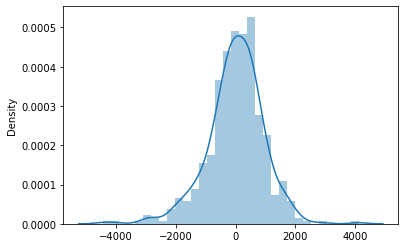

In [36]:
sns.distplot(train_residue)
plt.show()

### ERROR IS FOUND TO BE NORMALLY DISTRIBUTED WITH MEAN AS 0

In [37]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'weekday', 'workingday', 'spring', 'fall',
       'misty', 'light_rain_snow', 'reg_by_casual'],
      dtype='object')

#### TESTING THE MODEL ON THE TEST DATA

In [38]:
y_test = data_test.pop('cnt')
X_test = data_test[['yr','holiday','weekday','workingday','spring','fall','misty','light_rain_snow','reg_by_casual']]
X_test_sm = sm.add_constant(X_test)

In [39]:
y_test_predicted = lr_model.predict(X_test_sm)

### R2 SCORE OF THE TRAINING SET

In [40]:
train_r2_score = r2_score(y_train,y_train_predicted)
print(train_r2_score)

0.7658653678235712


### R2 SCORE OF THE TEST SET

In [41]:
test_r2_score = r2_score(y_test,y_test_predicted)
print(test_r2_score)

0.7583072705244176
